Nastawianie regulatorów

In [168]:
import pandas as pd
from matplotlib import pyplot as plt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


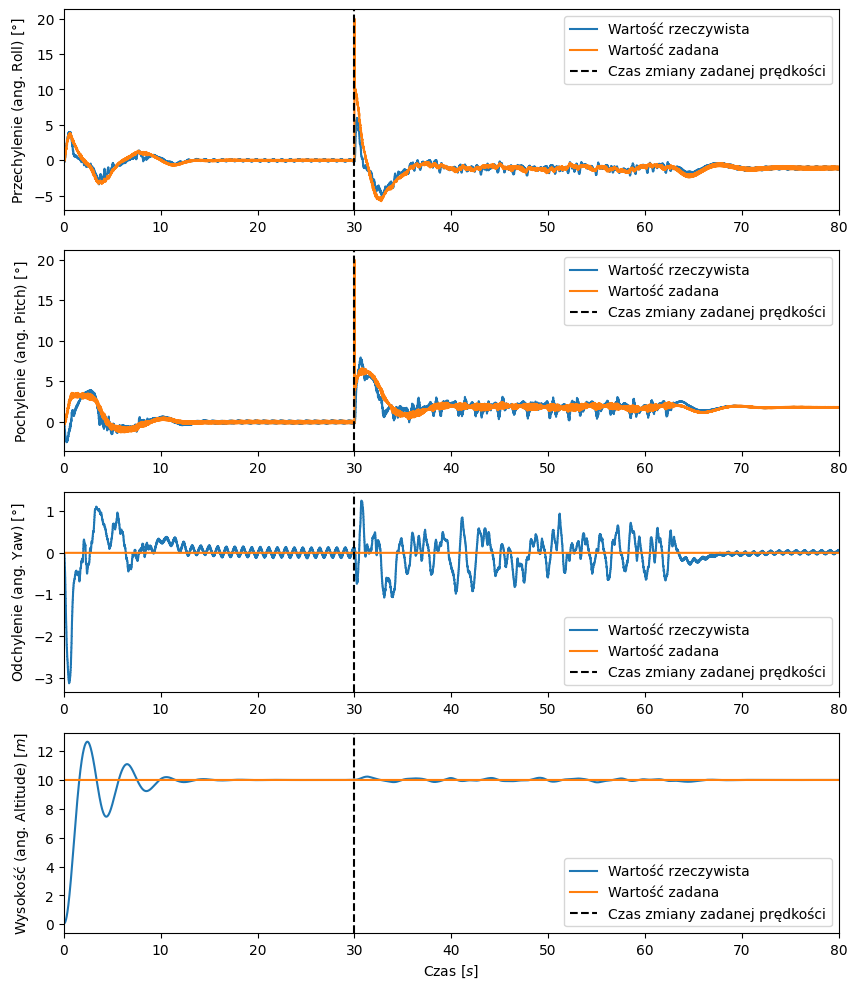

In [169]:
columns = ["time", "roll", "pitch", "yaw", "altitude", "linear_velocity_x", "linear_velocity_y", "desired_roll", "desired_pitch", "desired_yaw", "desired_altitude", "desired_linear_velocity_x", "desired_linear_velocity_y"]
df = pd.read_csv("data_backup/2/RotorControlData/Drone_1.csv", usecols=columns)

fig, axs = plt.subplots(4, 1, figsize=(10, 12))

axs[0].plot(df.time, df.roll)
axs[0].plot(df.time, df.desired_roll)
axs[0].set_ylabel("Przechylenie (ang. Roll) [$\degree$]")
# axs[0].set_xlabel("Czas [$s$]")
axs[0].set_xlim([0, 80])
axs[0].axvline(30,color='black',linestyle='--')
axs[0].legend(["Wartość rzeczywista", "Wartość zadana","Czas zmiany zadanej prędkości"])

axs[1].plot(df.time, df.pitch)
axs[1].plot(df.time, df.desired_pitch)
axs[1].set_ylabel("Pochylenie (ang. Pitch) [$\degree$]")
# axs[1].set_xlabel("Czas [$s$]")
axs[1].set_xlim([0, 80])
axs[1].axvline(30,color='black',linestyle='--')
axs[1].legend(["Wartość rzeczywista", "Wartość zadana","Czas zmiany zadanej prędkości"])

axs[2].plot(df.time, df.yaw)
axs[2].plot(df.time, df.desired_yaw)
axs[2].set_ylabel("Odchylenie (ang. Yaw) [$\degree$]")
# axs[2].set_xlabel("Czas [$s$]")
axs[2].set_xlim([0, 80])
axs[2].axvline(30,color='black',linestyle='--')
axs[2].legend(["Wartość rzeczywista", "Wartość zadana","Czas zmiany zadanej prędkości"])

axs[3].plot(df.time, df.altitude)
axs[3].plot(df.time, df.desired_altitude)
axs[3].set_ylabel("Wysokość (ang. Altitude) [$m$]")
axs[3].set_xlabel("Czas [$s$]")
axs[3].set_xlim([0, 80])
axs[3].axvline(30,color='black',linestyle='--')
axs[3].legend(["Wartość rzeczywista", "Wartość zadana","Czas zmiany zadanej prędkości"])

fig.savefig('pionowy_start_RPY.eps', format='eps', bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


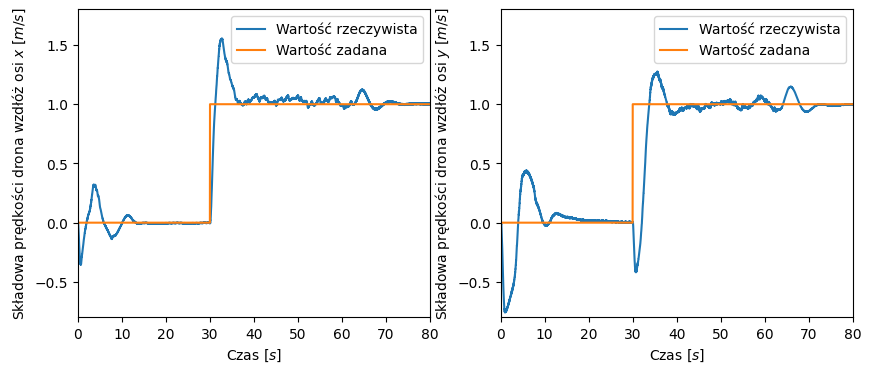

In [170]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(df.time, df.linear_velocity_x)
axs[0].plot(df.time, df.desired_linear_velocity_x)
axs[0].set_ylabel("Składowa prędkości drona wzdłóż osi $x$ [$m/s$]")
axs[0].set_xlabel("Czas [$s$]")
axs[0].set_ylim([-0.8, 1.8])
axs[0].set_xlim([0, 80])
axs[0].legend(["Wartość rzeczywista", "Wartość zadana"])

axs[1].plot(df.time, df.linear_velocity_y)
axs[1].plot(df.time, df.desired_linear_velocity_y)
axs[1].set_ylabel("Składowa prędkości drona wzdłóż osi $y$ [$m/s$]")
axs[1].set_xlabel("Czas [$s$]")
axs[1].set_ylim([-0.8, 1.8])
axs[1].set_xlim([0, 80])
axs[1].legend(["Wartość rzeczywista", "Wartość zadana"])

fig.savefig('pionowy_start_velocity.eps', format='eps', bbox_inches='tight')

plt.show()

[]

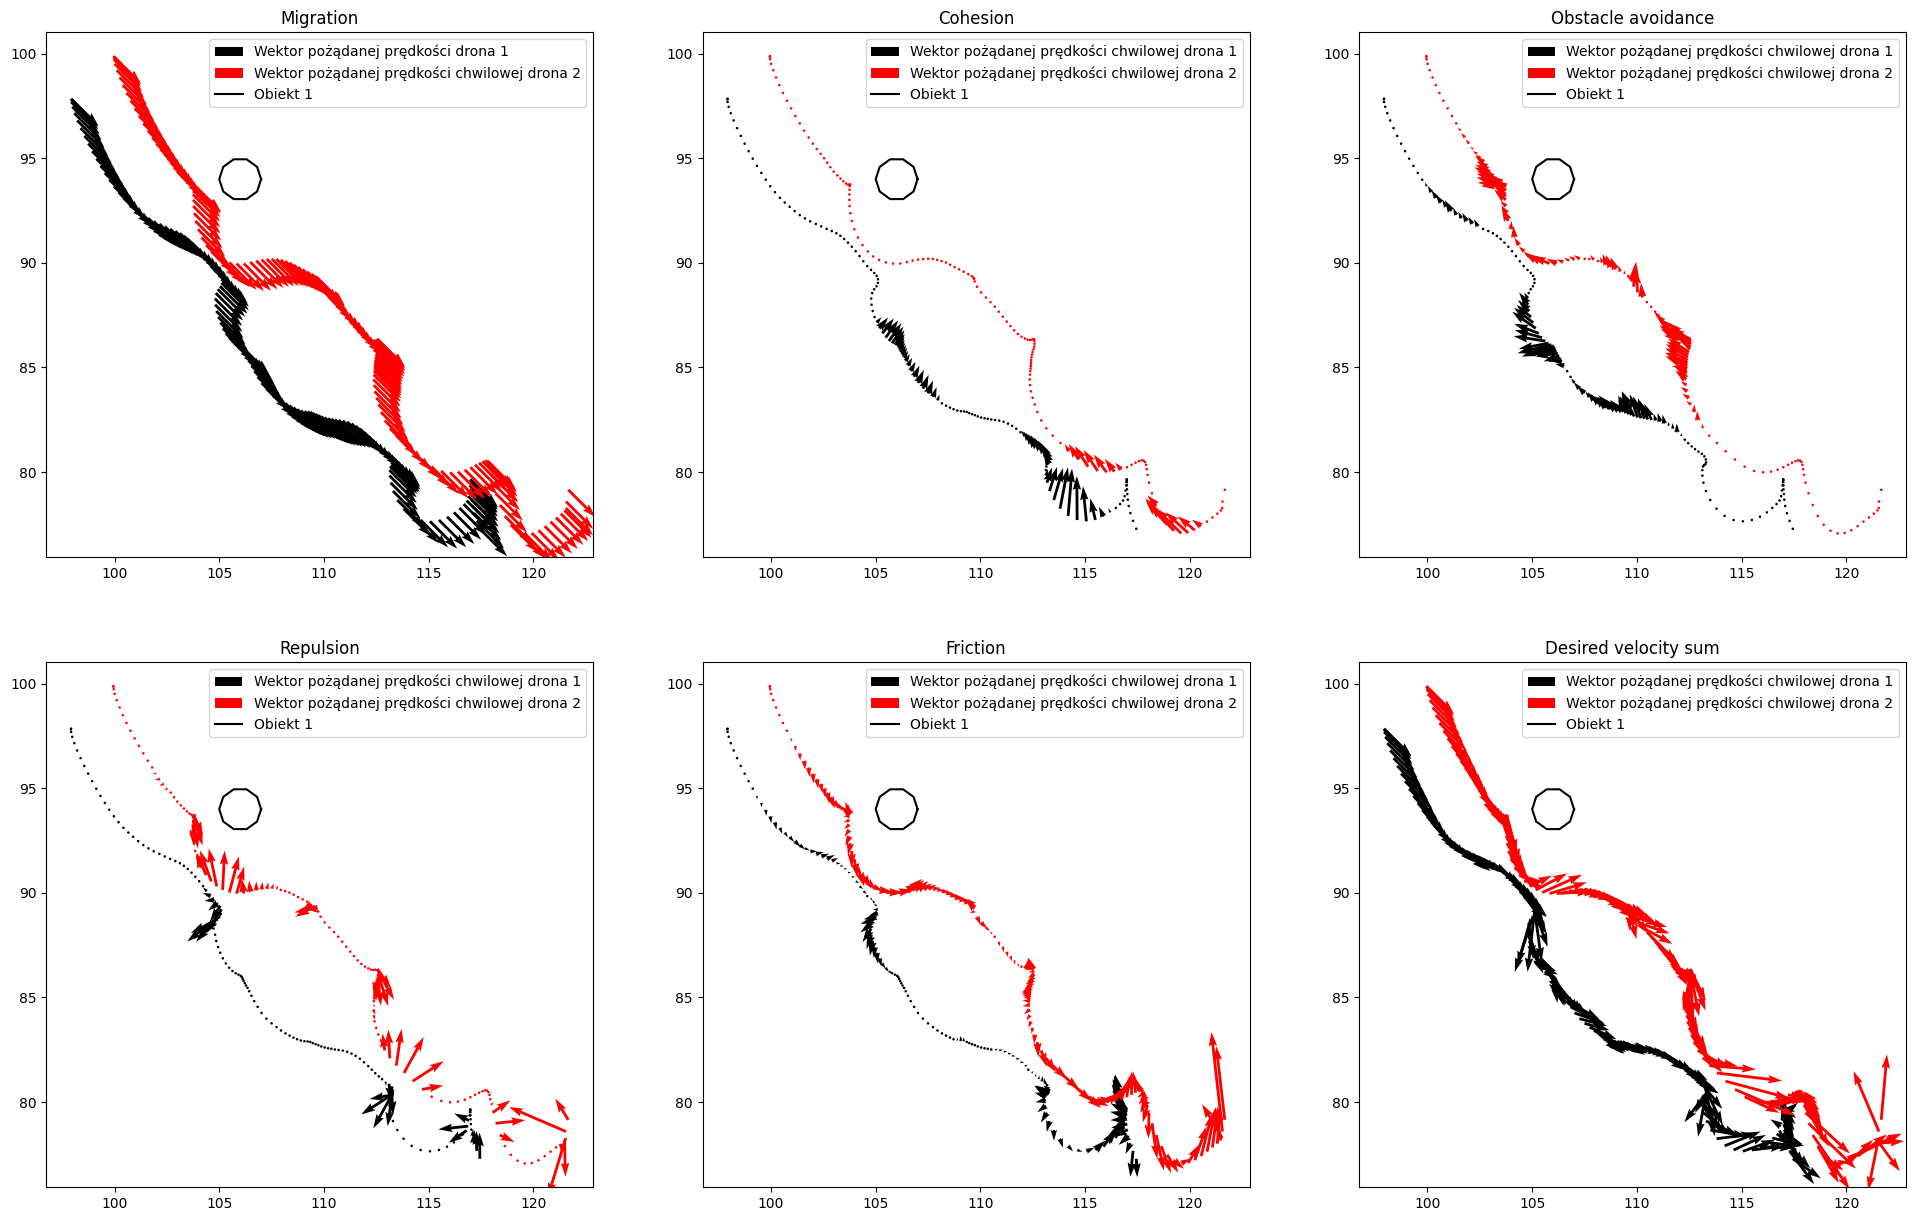

In [171]:
columns = ["id", "x", "y"]
df_obstacles = pd.read_csv("ObstaclesData/Obstacles.csv", usecols=columns)
list_of_df_obstacles = [g for _,g in df_obstacles.groupby("id", sort=False)]

def plot_obstacles(plot, list_of_df_obstacles):
    for obstacle in list_of_df_obstacles:
        plot.plot(obstacle.x, obstacle.y, color='black')

columns = ["time", "min_distance_to_obstacle", "min_distance_to_other_agent", "max_distance_to_other_agent", "position_x", "position_y", "velocity_x", "velocity_y", "migration_x", "migration_y", "cohesion_x", "cohesion_y", "repulsion_x", "repulsion_y", "friction_x", "friction_y", "obstacle_x", "obstacle_y", "desired_x", "desired_y"]
df1 = pd.read_csv("data_backup/1/FlockingData/Drone_1.csv", usecols=columns).iloc[::100,:]
df2 = pd.read_csv("data_backup/1/FlockingData/Drone_2.csv", usecols=columns).iloc[::100,:]
df3 = pd.read_csv("data_backup/1/FlockingData/Drone_3.csv", usecols=columns).iloc[::100,:]
df4 = pd.read_csv("data_backup/1/FlockingData/Drone_4.csv", usecols=columns).iloc[::100,:]
df5 = pd.read_csv("data_backup/1/FlockingData/Drone_5.csv", usecols=columns).iloc[::100,:]
df6 = pd.read_csv("data_backup/1/FlockingData/Drone_6.csv", usecols=columns).iloc[::100,:]

df1 = df1[df1['time'] < 70]
df2 = df2[df2['time'] < 70]
df3 = df3[df3['time'] < 70]
df4 = df4[df4['time'] < 70]
df5 = df5[df5['time'] < 70]
df6 = df6[df6['time'] < 70]

# df1 = df3
# df2 = df4

fig, axs = plt.subplots(2, 3, figsize=(24, 15))

axs[0, 0].quiver(df1.position_x, df1.position_y, df1.migration_x, df1.migration_y, scale=10)
axs[0, 0].quiver(df2.position_x, df2.position_y, df2.migration_x, df2.migration_y, scale=10, color='r')
plot_obstacles(axs[0, 0], list_of_df_obstacles)
axs[0, 0].legend(["Wektor pożądanej prędkości drona 1", "Wektor pożądanej prędkości chwilowej drona 2", "Obiekt 1", "Obiekt 2", "Obiekt 3"])
axs[0, 0].set_title("Migration")

axs[0, 1].quiver(df1.position_x, df1.position_y, df1.cohesion_x, df1.cohesion_y, scale=10)
axs[0, 1].quiver(df2.position_x, df2.position_y, df2.cohesion_x, df2.cohesion_y, scale=10, color='r')
plot_obstacles(axs[0, 1], list_of_df_obstacles)
axs[0, 1].legend(["Wektor pożądanej prędkości chwilowej drona 1", "Wektor pożądanej prędkości chwilowej drona 2", "Obiekt 1", "Obiekt 2", "Obiekt 3"])
axs[0, 1].set_title("Cohesion")

axs[1, 0].quiver(df1.position_x, df1.position_y, df1.repulsion_x, df1.repulsion_y, scale=10)
axs[1, 0].quiver(df2.position_x, df2.position_y, df2.repulsion_x, df2.repulsion_y, scale=10, color='r')
plot_obstacles(axs[1, 0], list_of_df_obstacles)
axs[1, 0].legend(["Wektor pożądanej prędkości chwilowej drona 1", "Wektor pożądanej prędkości chwilowej drona 2", "Obiekt 1", "Obiekt 2", "Obiekt 3"])
axs[1, 0].set_title("Repulsion")

axs[1, 1].quiver(df1.position_x, df1.position_y, df1.friction_x, df1.friction_y, scale=10)
axs[1, 1].quiver(df2.position_x, df2.position_y, df2.friction_x, df2.friction_y, scale=10, color='r')
plot_obstacles(axs[1, 1], list_of_df_obstacles)
axs[1, 1].legend(["Wektor pożądanej prędkości chwilowej drona 1", "Wektor pożądanej prędkości chwilowej drona 2", "Obiekt 1", "Obiekt 2", "Obiekt 3"])
axs[1, 1].set_title("Friction")

axs[0, 2].quiver(df1.position_x, df1.position_y, df1.obstacle_x, df1.obstacle_y, scale=10)
axs[0, 2].quiver(df2.position_x, df2.position_y, df2.obstacle_x, df2.obstacle_y, scale=10, color='r')
plot_obstacles(axs[0, 2], list_of_df_obstacles)
axs[0, 2].legend(["Wektor pożądanej prędkości chwilowej drona 1", "Wektor pożądanej prędkości chwilowej drona 2", "Obiekt 1", "Obiekt 2", "Obiekt 3"])
axs[0, 2].set_title("Obstacle avoidance")

axs[1, 2].quiver(df1.position_x, df1.position_y, df1.desired_x, df1.desired_y, scale=10)
axs[1, 2].quiver(df2.position_x, df2.position_y, df2.desired_x, df2.desired_y, scale=10, color='r')
plot_obstacles(axs[1, 2], list_of_df_obstacles)
axs[1, 2].legend(["Wektor pożądanej prędkości chwilowej drona 1", "Wektor pożądanej prędkości chwilowej drona 2", "Obiekt 1", "Obiekt 2", "Obiekt 3"])
axs[1, 2].set_title("Desired velocity sum")

plt.plot()

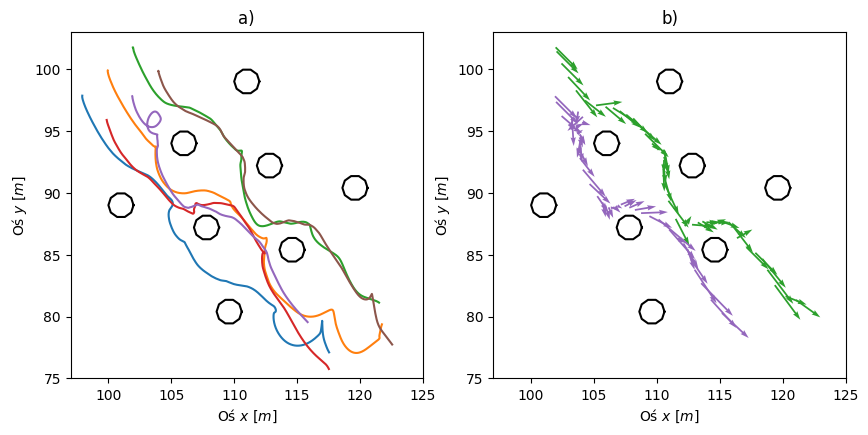

In [172]:
columns = ["id", "x", "y"]
df_obstacles = pd.read_csv("data_backup/1/ObstaclesData/Obstacles.csv", usecols=columns)
list_of_df_obstacles = [g for _,g in df_obstacles.groupby("id", sort=False)]

columns = ["time", "min_distance_to_obstacle", "min_distance_to_other_agent", "max_distance_to_other_agent", "position_x", "position_y", "velocity_x", "velocity_y", "migration_x", "migration_y", "cohesion_x", "cohesion_y", "repulsion_x", "repulsion_y", "friction_x", "friction_y", "obstacle_x", "obstacle_y", "desired_x", "desired_y"]
df1 = pd.read_csv("data_backup/1/FlockingData/Drone_1.csv", usecols=columns)
df2 = pd.read_csv("data_backup/1/FlockingData/Drone_2.csv", usecols=columns)
df3 = pd.read_csv("data_backup/1/FlockingData/Drone_3.csv", usecols=columns)
df4 = pd.read_csv("data_backup/1/FlockingData/Drone_4.csv", usecols=columns)
df5 = pd.read_csv("data_backup/1/FlockingData/Drone_5.csv", usecols=columns)
df6 = pd.read_csv("data_backup/1/FlockingData/Drone_6.csv", usecols=columns)

df1 = df1[df1['time'] < 70]
df2 = df2[df2['time'] < 70]
df3 = df3[df3['time'] < 70]
df4 = df4[df4['time'] < 70]
df5 = df5[df5['time'] < 70]
df6 = df6[df6['time'] < 70]

fig, ax = plt.subplots(1, 2, figsize=(10, 4.5))

plot_obstacles(ax[0], list_of_df_obstacles)
ax[0].plot(df1.position_x, df1.position_y)
ax[0].plot(df2.position_x, df2.position_y)
ax[0].plot(df3.position_x, df3.position_y)
ax[0].plot(df4.position_x, df4.position_y)
ax[0].plot(df5.position_x, df5.position_y)
ax[0].plot(df6.position_x, df6.position_y)
ax[0].set_xlim([97, 125])
ax[0].set_ylim([75, 103])
ax[0].set_xlabel('Oś $x$ [$m$]')
ax[0].set_ylabel('Oś $y$ [$m$]')
ax[0].set_title('a)')

plot_obstacles(ax[1], list_of_df_obstacles)
df1_tmp = df3.iloc[::300,:]
df2_tmp = df5.iloc[::300,:]
ax[1].quiver(df1_tmp.position_x, df1_tmp.position_y, df1_tmp.desired_x, df1_tmp.desired_y, scale=8, color='tab:green', width=0.005)
ax[1].quiver(df2_tmp.position_x, df2_tmp.position_y, df2_tmp.desired_x, df2_tmp.desired_y, scale=8, color='tab:purple', width=0.005)
ax[1].set_xlim([97, 125])
ax[1].set_ylim([75, 103])
ax[1].set_xlabel('Oś $x$ [$m$]')
ax[1].set_ylabel('Oś $y$ [$m$]')
ax[1].set_title('b)')

fig.savefig('LAS_pozycja_dronow_podczas_lotu.eps', format='eps', bbox_inches='tight')

In [173]:
import numpy as np
from scipy.interpolate import interp1d

dfs = [df1, df2, df3, df4, df5, df6]
time_points_10000 = np.linspace(15, 70, 10000)

# Interpolacja każdego DataFrame'u dla 'min_distance_to_obstacle' na 10000 punktów
interpolated_dfs = []
for df in dfs:
    interpolation_function = interp1d(df['time'], df['min_distance_to_obstacle'], kind='linear', fill_value='extrapolate')
    interpolated_values = interpolation_function(time_points_10000)
    interpolated_dfs.append(interpolated_values)

# Znalezienie minimalnych wartości dla każdego punktu czasowego
min_values_across_dfs = np.min(interpolated_dfs, axis=0)
max_values_across_dfs = np.max(interpolated_dfs, axis=0)
mean_values_across_dfs = np.mean(interpolated_dfs, axis=0)

# Interpolacja każdego DataFrame'u dla 'min_distance_to_obstacle' na 10000 punktów
interpolated_dfs = []
for df in dfs:
    interpolation_function = interp1d(df['time'], df['min_distance_to_other_agent'], kind='linear', fill_value='extrapolate')
    interpolated_values = interpolation_function(time_points_10000)
    interpolated_dfs.append(interpolated_values)

min_distance_to_other_agents_values = np.min(interpolated_dfs, axis=0)

interpolated_dfs = []
for df in dfs:
    interpolation_function = interp1d(df['time'], df['max_distance_to_other_agent'], kind='linear', fill_value='extrapolate')
    interpolated_values = interpolation_function(time_points_10000)
    interpolated_dfs.append(interpolated_values)

max_distance_to_other_agents_values = np.max(interpolated_dfs, axis=0)

# # Rysowanie wykresu z minimalnymi wartościami
# fig, ax = plt.subplots(3, 1, figsize=(10, 8))
# # plt.plot(time_points_10000, min_values_across_dfs, color='red')
# # plt.plot(time_points_10000, max_values_across_dfs, color='green')
# ax[0].plot(time_points_10000, mean_values_across_dfs, color='tab:blue')
# ax[0].fill_between(time_points_10000, min_values_across_dfs, max_values_across_dfs, color='tab:blue', alpha=0.2)
# ax[0].set_xlim([15, 70])
# ax[0].set_title("a)", x=1.02, y=0.36)
# ax[0].set_ylabel('Wartość prędkości [$m/s$]')
# ax[0].legend(["Średnia", "Przedział wartości minimalnej i maksymalna"])

In [174]:
# Define the time points for interpolation (assuming 10000 points as mentioned)
time_points_10000 = np.linspace(15, 70, 10000)

# Interpolate 'position_x' and 'position_y' for each DataFrame
interpolated_dfs = []
for df in dfs:
    interpolation_function_x = interp1d(df['time'], df['position_x'], kind='linear', fill_value='extrapolate')
    interpolation_function_y = interp1d(df['time'], df['position_y'], kind='linear', fill_value='extrapolate')

    interpolated_values_x = interpolation_function_x(time_points_10000)
    interpolated_values_y = interpolation_function_y(time_points_10000)

    interpolated_df = pd.DataFrame({
        'time': time_points_10000,
        'position_x': interpolated_values_x,
        'position_y': interpolated_values_y
    })

    interpolated_dfs.append(interpolated_df)

# Calculate the mean distance between each pair of drones at each time point
mean_distances = []
combinations = [(a, b) for idx, a in enumerate(interpolated_dfs) for b in interpolated_dfs[idx + 1:]]

for time_point in range(len(time_points_10000)):
    distances = []
    for drone1, drone2 in combinations:
        position1 = np.array([drone1.iloc[time_point]['position_x'], drone1.iloc[time_point]['position_y']])
        position2 = np.array([drone2.iloc[time_point]['position_x'], drone2.iloc[time_point]['position_y']])
        distance = np.linalg.norm(position1 - position2)
        distances.append(distance)

    mean_distance = np.mean(distances)
    mean_distances.append(mean_distance)

# Create a DataFrame for the mean distances
mean_distances_df = pd.DataFrame({
    'time': time_points_10000,
    'mean_distance': mean_distances
})

# Display the first few rows of the mean distances DataFrame
mean_distances_df

,time,mean_distance
0,15.000000,3.972007
1,15.005501,3.972269
2,15.011001,3.972524
3,15.016502,3.972775
4,15.022002,3.973012
...,...,...
9995,69.977998,4.493895
9996,69.983498,4.495382
9997,69.988999,4.496869
9998,69.994499,4.498357


In [175]:
# Interpolate 'velocity_x' and 'velocity_y' for each DataFrame and calculate the speed
interpolated_velocity_x_dfs = []
interpolated_velocity_y_dfs = []

for df in dfs:
    # Interpolate velocity_x
    interpolation_function_x = interp1d(df['time'], df['velocity_x'], kind='linear', fill_value='extrapolate')
    interpolated_values_x = interpolation_function_x(time_points_10000)
    interpolated_velocity_x_dfs.append(interpolated_values_x)

    # Interpolate velocity_y
    interpolation_function_y = interp1d(df['time'], df['velocity_y'], kind='linear', fill_value='extrapolate')
    interpolated_values_y = interpolation_function_y(time_points_10000)
    interpolated_velocity_y_dfs.append(interpolated_values_y)

# Calculate the speed for each drone
speed_dfs = []
for vx, vy in zip(interpolated_velocity_x_dfs, interpolated_velocity_y_dfs):
    speed = np.sqrt(vx**2 + vy**2)
    speed_dfs.append(speed)

# Calculate the mean speed for all drones over the interpolated time points
mean_speeds = np.mean(np.array(speed_dfs), axis=0)
min_speeds = np.min(np.array(speed_dfs), axis=0)
max_speeds = np.max(np.array(speed_dfs), axis=0)


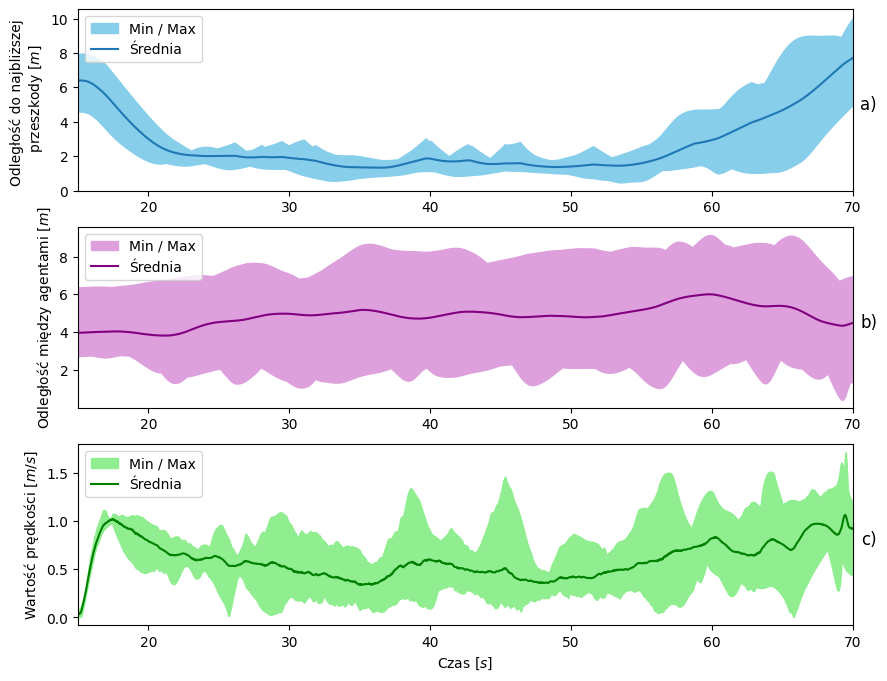

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [204]:
# Rysowanie wykresu z minimalnymi wartościami
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
# plt.plot(time_points_10000, min_values_across_dfs, color='red')
# plt.plot(time_points_10000, max_values_across_dfs, color='green')
ax[0].fill_between(time_points_10000, min_values_across_dfs, max_values_across_dfs, color='skyblue')
ax[0].plot(time_points_10000, mean_values_across_dfs, color='tab:blue')
ax[0].set_xlim([15, 70])
ax[0].set_title("a)", x=1.02, y=0.40)
ax[0].set_ylabel('Odległość do najbliższej \n przeszkody [$m$]')
ax[0].legend(["Min / Max", "Średnia"], loc="upper left")
# plt.plot(time_points_10000, min_distance_to_other_agents_values, label='Minimum Values Across DataFrames', color='red')
# plt.plot(time_points_10000, max_distance_to_other_agents_values, label='Minimum Values Across DataFrames', color='green')
ax[1].fill_between(time_points_10000, min_distance_to_other_agents_values, max_distance_to_other_agents_values, color='plum')
ax[1].plot(time_points_10000, mean_distances_df['mean_distance'], label='Minimum Values Across DataFrames', color='purple')
ax[1].set_title("b)", x=1.02, y=0.40)
ax[1].set_xlim([15, 70])
ax[1].set_ylabel('Odległość między agentami [$m$]')
ax[1].legend(["Min / Max", "Średnia"], loc="upper left")
ax[2].fill_between(time_points_10000, min_speeds, max_speeds, color='lightgreen')
ax[2].plot(time_points_10000, mean_speeds, label='Średnia prędkość wszystkich dronów', color='green')
ax[2].set_xlabel('Czas [$s$]')
ax[2].set_xlim([15, 70])
ax[2].set_ylabel('Wartość prędkości [$m/s$]')
ax[2].set_title("c)", x=1.02, y=0.40)
ax[2].legend(["Min / Max", "Średnia"], loc="upper left")
plt.show()

fig.savefig('LAS_odległość_i_prędkość.eps', format='eps', bbox_inches='tight')

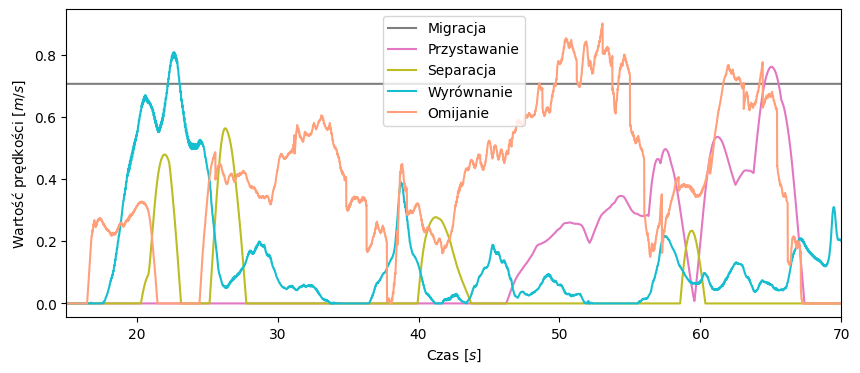

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [183]:
# Calculating the vector lengths for each component for Drone 1
vector_lengths_drone1 = {}

# Selecting data for Drone 1
df_drone1 = df5

for component_base in ['migration', 'cohesion', 'repulsion', 'friction', 'obstacle']:
    # Interpolate the x and y components for Drone 1
    interpolation_function_x = interp1d(df_drone1['time'], df_drone1[component_base + '_x'], kind='linear', fill_value='extrapolate')
    interpolated_values_x = interpolation_function_x(time_points_10000)

    interpolation_function_y = interp1d(df_drone1['time'], df_drone1[component_base + '_y'], kind='linear', fill_value='extrapolate')
    interpolated_values_y = interpolation_function_y(time_points_10000)

    # Calculate the vector length for the component
    length = np.sqrt(interpolated_values_x**2 + interpolated_values_y**2)
    vector_lengths_drone1[component_base] = length

# Plotting the vector lengths for each component for Drone 1 over time
fig, ax = plt.subplots(figsize=(10, 4))
for (component, values), labelka, kolor in zip(vector_lengths_drone1.items(), ["Migracja", "Przystawanie", "Separacja", "Wyrównanie", "Omijanie"], ["tab:gray", "tab:pink", "tab:olive", "tab:cyan", "lightsalmon"]):
    ax.plot(time_points_10000, values, label=labelka, color=kolor)

ax.set_xlabel('Czas [$s$]')
ax.set_ylabel('Wartość prędkości [$m/s$]')
ax.set_xlim([15, 70])
ax.legend(loc='upper center')
plt.show()

fig.savefig('LAS_składowe_stadnego.eps', format='eps', bbox_inches='tight')

In [178]:
# columns = ["position_x", "position_y", "virtual_vel_x", "virtual_vel_y"]
# df_virtual_velocity = pd.read_csv("ObstaclesData/VirtualVelocities.csv", usecols=columns).drop_duplicates()

# plot_obstacles(plt, list_of_df_obstacles)
# plt.quiver(df_virtual_velocity.position_x, df_virtual_velocity.position_y, df_virtual_velocity.virtual_vel_x, df_virtual_velocity.virtual_vel_y, scale=5)
# plt.axis([0, 15, 0, 15])
# plt.show()

In [179]:
# #TEST
# from shapely.geometry import Point, Polygon, LineString
# from shapely.ops import nearest_points
# from matplotlib import pyplot as plt
# import numpy as np

# def create_regular_polygon(center_x, center_y, num_points, radius):
#         angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

#         vertices_x = center_x + radius * np.cos(angles)
#         vertices_y = center_y + radius * np.sin(angles)

#         vertices = [(vertices_x[i], vertices_y[i]) for i in range(num_points)]

#         polygon = Polygon(vertices)
#         return polygon

# def get_obstacles_position_and_velocity(obstacles, my_position, v_shill):
#         my_point = Point(my_position[0], my_position[1])
#         result = []

#         for polygon in obstacles:
#             nearest_point_on_polygon, _ = nearest_points(polygon.exterior, my_point)
#             print('ala: ', nearest_point_on_polygon)
#             polygon_center = np.array(polygon.centroid.coords[0])

#             nearest_point = None
#             for i in range(len(polygon.exterior.coords) - 1):
#                 point = Point([polygon.exterior.coords[i]])
#                 print('pt: ', point)
#                 if point.contains(nearest_point_on_polygon):
#                     nearest_point = point
#                     break

#             if (nearest_point is not None):
#                 unit_normal_vector = np.array([nearest_point.x - polygon_center[0], nearest_point.y - polygon_center[1]])
#                 unit_normal_vector = (unit_normal_vector / np.linalg.norm(unit_normal_vector)) * v_shill

#                 result.append((np.array([nearest_point_on_polygon.x, nearest_point_on_polygon.y]), unit_normal_vector))
#                 continue

#             nearest_edge = None
#             for i in range(len(polygon.exterior.coords) - 1):
#                 edge = LineString([polygon.exterior.coords[i], polygon.exterior.coords[i + 1]])
#                 print(edge)
#                 if nearest_point_on_polygon.distance(edge) < 1e-8:
#                     nearest_edge = edge
#                     break

#             nearest_edge_first_point_x, nearest_edge_first_point_y = nearest_edge.coords[0]

#             vector_edge_to_point = np.array([nearest_point_on_polygon.x - nearest_edge_first_point_x, nearest_point_on_polygon.y - nearest_edge_first_point_y])
#             vector_perpendicular_to_edge = np.array([-vector_edge_to_point[1], vector_edge_to_point[0]])

#             vector_polygon_center_to_point = np.array([nearest_point_on_polygon.x - polygon_center[0], nearest_point_on_polygon.y - polygon_center[1]])

#             dot_product = np.dot(vector_perpendicular_to_edge, vector_polygon_center_to_point)

#             if dot_product > 0:
#                 unit_normal_vector = vector_perpendicular_to_edge / np.linalg.norm(vector_perpendicular_to_edge)
#             else:
#                 unit_normal_vector = -vector_perpendicular_to_edge / np.linalg.norm(vector_perpendicular_to_edge)
#             unit_normal_vector = unit_normal_vector * v_shill

#             result.append((np.array([nearest_point_on_polygon.x, nearest_point_on_polygon.y]), unit_normal_vector))
#             continue

#         return result

# polygon = create_regular_polygon(10, 10, 10, 2)
# x, y = polygon.exterior.xy
# plt.plot(x, y)
# plt.plot(8.456816779075433, 8.770047229336097, 'ro')
# # plt.plot(point.x, point.y, 'ro')
# # plt.plot(nearest_point_on_polygon.x, nearest_point_on_polygon.y, 'go')
# # plt.quiver(nearest_point_on_polygon.x, nearest_point_on_polygon.y, unit_normal_vector[0], unit_normal_vector[1])
# # plt.axis([0, 15, 0, 15])
# plt.show()
# print(get_obstacles_position_and_velocity([polygon], np.array([1.38469446, -0.96389407]), 1))


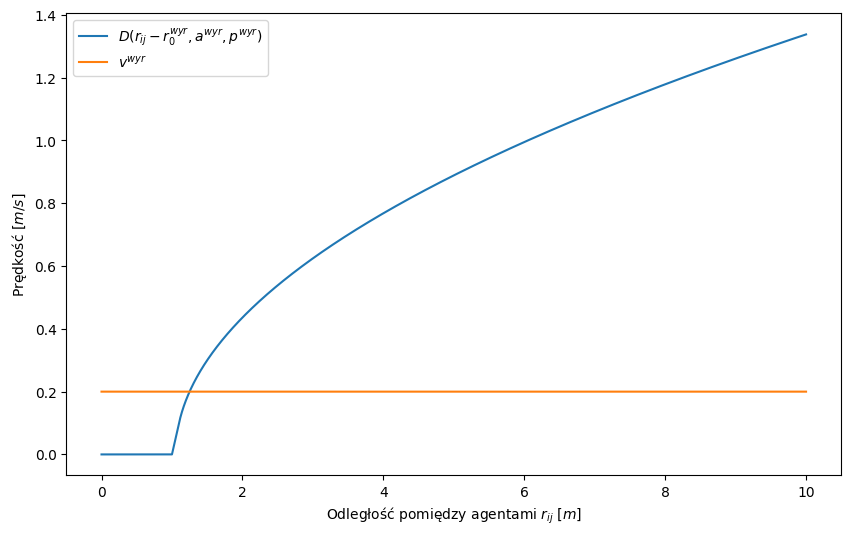

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [180]:
import numpy as np
def D(r, a, p):
        if(r <= 0):
            return 0
        elif(0 < r*p and r*p < a/p):
            return r*p
        else:
            return np.sqrt(2*a*r - (a**2)/(p**2))

r_vec = np.linspace(0, 10, 10000)
d_vec = []
for x in r_vec:
     d_vec.append(D(x - 1, 0.1, 1))

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r_vec, d_vec)
ax.plot(r_vec, r_vec*0 + 0.2)
ax.set_xlabel("Odległość pomiędzy agentami $r_{ij}$ [$m$]")
ax.set_ylabel("Prędkość [$m/s$]")
ax.legend(["$D(r_{ij} - r_{0}^{wyr}, a^{wyr}, p^{wyr})$", "$v^{wyr}$"])
plt.show()
fig.savefig('decay.eps', format='eps', bbox_inches='tight')
